# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [2]:
library(tidyverse)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [3]:
data1 <- read.csv('../Sourcedata/graded_assignment_2.csv', sep = ';')
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,37,0,0,female,65+,80 - 84
2,2,0,1,male,65-,5 - 9
3,20,1,0,male,65+,95 - 99
4,18,1,1,male,65+,85 - 89
5,11,0,1,male,65-,50 - 54
6,14,1,0,male,65+,65 - 69


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [4]:
data2 <- data1 %>%
    mutate(Health_status = ifelse(FKG == 0 & DKG == 0, "1", "0"))  
head(data2)

ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
1,37,0,0,female,65+,80 - 84,1
2,2,0,1,male,65-,5 - 9,0
3,20,1,0,male,65+,95 - 99,0
4,18,1,1,male,65+,85 - 89,0
5,11,0,1,male,65-,50 - 54,0
6,14,1,0,male,65+,65 - 69,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [5]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  37 2 20 18 11 14 5 16 9 13 ...
 $ FKG          : int  0 0 1 1 0 1 0 0 1 1 ...
 $ DKG          : int  0 1 0 1 1 0 0 0 1 0 ...
 $ Gender       : Factor w/ 2 levels "female","male": 1 2 2 2 2 2 2 2 2 2 ...
 $ Elderly      : Factor w/ 2 levels "65+","65-": 1 2 1 1 2 1 2 1 2 2 ...
 $ Age          : Factor w/ 20 levels "0 - 4","10 - 14",..: 17 10 20 18 11 14 4 16 8 13 ...
 $ Health_status: num  1 0 0 0 0 0 1 1 0 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [6]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3783
female,1,1252
male,0,3762
male,1,1203


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



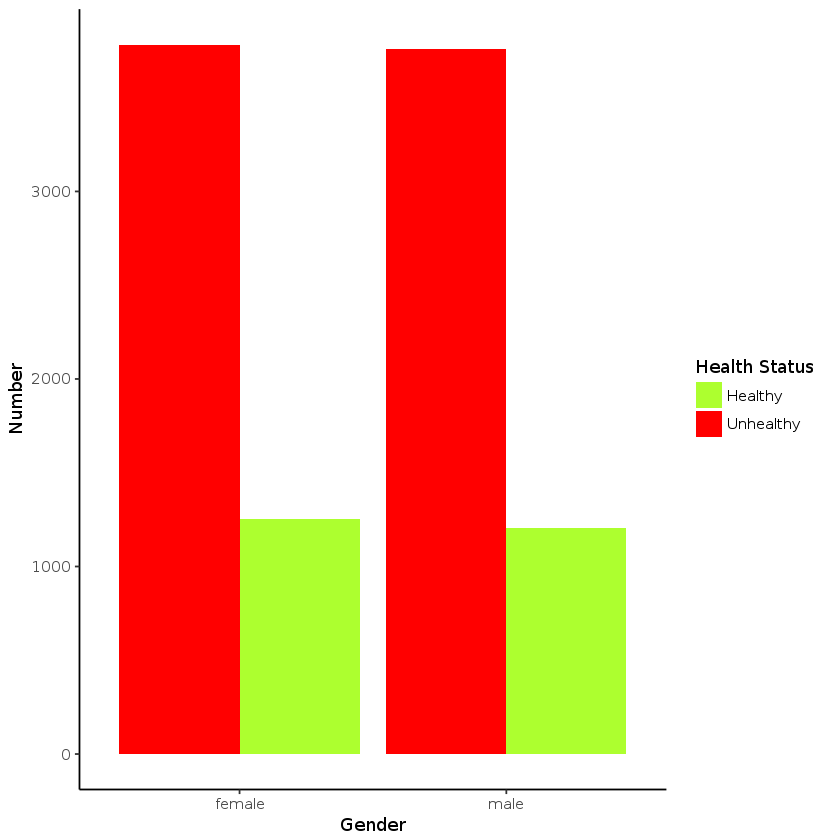

In [7]:
ggplot(data3, aes(x = Gender, y = Count_observations, fill = Health_status)) +
    geom_col(position = "dodge") +
    xlab("Gender") +
    ylab("Number") +
    scale_fill_manual("Health Status",
                      values = c("red", "greenyellow"),
                      labels = c("Unhealthy", "Healthy"),
                      guide = guide_legend(reverse = TRUE)) +
    theme_classic()

End notebook